Вы аналитик оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей.
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


Шаг 1. Откройте файл с данными и изучите общую информацию.

Шаг 2. Подготовьте данные

    Приведите данные к нужным типам;
    Найдите и исправьте ошибки в данных, если они есть.
    Поясните, какие ошибки вы нашли и как их исправили.
    В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:

    количество сделанных звонков и израсходованных минут разговора по месяцам;
    количество отправленных сообщений по месяцам;
    объем израсходованного интернет-трафика по месяцам;
    помесячную выручку с каждого пользователя

Постройте графики для более наглядной демонстрации.



# Описание данных

Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана


Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок


Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя


Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



# Конечный результат эта сводная таблица с данными по использованным услугам всех абонентов по месячно

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# Загрузка данных
df_user = pd.read_csv('data/CSV/users.csv')
df_calls = pd.read_csv('data/CSV/calls.csv')
df_internet = pd.read_csv('data/CSV/internet.csv')
df_messages = pd.read_csv('data/CSV/messages.csv')
df_tariffs = pd.read_csv('data/CSV/tariffs.csv')

## Проверка и предобработка данных

In [3]:
df_user.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
81,1081,42,NaN,Москва,Софья,Терехова,2018-03-25,ultra
264,1264,47,NaN,Хабаровск,Саида,Жукова,2018-04-22,smart
222,1222,44,NaN,Уфа,Пётр,Булгаков,2018-08-30,ultra
430,1430,22,NaN,Тверь,Андрей,Авроров,2018-04-23,ultra
165,1165,19,NaN,Самара,Алексей,Медведев,2018-10-14,ultra


In [4]:
#Проверяю типы данных и пропуски
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В столбце **churn_date** большое количество протусков, но в контексте задания это допустимо

In [5]:
#Статистическая информация
df_user.describe(include = 'all')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.000000,500.00000,38,500,500,500,500,500
unique,NaN,NaN,33,76,246,419,270,2
top,NaN,NaN,2018-12-03,Москва,Радим,Андреенко,2018-05-28,smart
freq,NaN,NaN,2,99,6,5,8,351
mean,1249.500000,46.58800,NaN,NaN,NaN,NaN,NaN,NaN
std,144.481833,16.66763,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,18.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1124.750000,32.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1249.500000,46.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1374.250000,62.00000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Проверка на дубликаты
print(f'В датасете {len(df_user) - len(df_user.drop_duplicates())} дубликатов строк')

В датасете 0 дубликатов строк


In [7]:
#Проверю нет ли строк, где churn_date меньше reg_date
len(df_user[(df_user.churn_date < df_user.reg_date)])

0

Все **churn_date** посде **reg_date**

In [8]:
#Проверю нет ли ошибок в названиях городов
df_user.city.unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Ошибок в названиях городов не наблюдаю

In [9]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
#Проверяю типы данных
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


In [11]:
df_calls.sample(5)

,id,call_date,duration,user_id
30333,1076_625,2018-12-07,10.48,1076
31596,1078_940,2018-09-05,0.00,1078
157759,1391_240,2018-08-21,6.39,1391
70572,1176_352,2018-02-21,8.64,1176
148835,1376_106,2018-11-06,0.00,1376


In [12]:
#Проверяю типы данных и пропуски
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [13]:
#Статистическая информация
df_calls.describe(include = 'all')

,id,call_date,duration,user_id
count,202607,202607,202607.000000,202607.000000
unique,202607,365,NaN,NaN
top,1000_0,2018-12-31,NaN,NaN
freq,1,1435,NaN,NaN
mean,NaN,NaN,6.755887,1253.940619
std,NaN,NaN,5.843365,144.722751
min,NaN,NaN,0.000000,1000.000000
25%,NaN,NaN,1.300000,1126.000000
50%,NaN,NaN,6.000000,1260.000000
75%,NaN,NaN,10.700000,1379.000000


In [14]:
# Проверка на дубликаты
print(f'В датасете {len(df_calls) - len(df_calls.drop_duplicates())} дубликатов строк')

В датасете 0 дубликатов строк


In [15]:
df_internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
113274,113274,1383_82,190.81,2018-11-15,1383
37514,37514,1130_412,266.14,2018-04-30,1130
131848,131848,1438_75,410.89,2018-12-08,1438
130099,130099,1433_294,169.75,2018-12-10,1433
77083,77083,1260_187,424.68,2018-10-23,1260


In [16]:
#Проверяю типы данных и пропуски
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [17]:
df_internet.describe(include = 'all')

,Unnamed: 0,id,mb_used,session_date,user_id
count,149396.000000,149396,149396.000000,149396,149396.000000
unique,NaN,149396,NaN,365,NaN
top,NaN,1000_0,NaN,2018-12-31,NaN
freq,NaN,1,NaN,1057,NaN
mean,74697.500000,NaN,370.192426,NaN,1252.099842
std,43127.054745,NaN,278.300951,NaN,144.050823
min,0.000000,NaN,0.000000,NaN,1000.000000
25%,37348.750000,NaN,138.187500,NaN,1130.000000
50%,74697.500000,NaN,348.015000,NaN,1251.000000
75%,112046.250000,NaN,559.552500,NaN,1380.000000


In [18]:
# Проверка на дубликаты
print(f'В датасете {len(df_internet) - len(df_internet.drop_duplicates())} дубликатов строк')

В датасете 0 дубликатов строк


In [19]:
df_messages.sample(5)

,id,message_date,user_id
83222,1346_133,2018-09-14,1346
111425,1451_4,2018-12-22,1451
115604,1471_832,2018-06-21,1471
53084,1234_53,2018-12-31,1234
69077,1295_171,2018-12-26,1295


In [20]:
#Проверяю типы данных и пропуски
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [21]:
# Проверка на дубликаты
print(f'В датасете {len(df_messages) - len(df_messages.drop_duplicates())} дубликатов строк')

В датасете 0 дубликатов строк


In [22]:
df_messages.describe(include = 'all')

,id,message_date,user_id
count,123036,123036,123036.000000
unique,123036,364,NaN
top,1000_0,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,1256.989410
std,NaN,NaN,143.523967
min,NaN,NaN,1000.000000
25%,NaN,NaN,1134.000000
50%,NaN,NaN,1271.000000
75%,NaN,NaN,1381.000000


Выводы:

- в таблице df_internet лишний столбец *Unnamed: 0*
- типы данных в колонках с датами надо поменять на *datetime*
- для удобства объединения таблиц надо переименовать в таблице *df_tariffs* столбец *'tariff_name'* в *'tariff'*
- для удобства объединения таблиц надо добавить в таблицах *df_messages*, *df_internet*, *df_calls* столбец *month*

## Предобработка данных

In [23]:
#Меняю тип данных в колонках с датой
df_user.reg_date = df_user.reg_date.astype("datetime64[ns]")
df_user.churn_date = df_user.churn_date.astype("datetime64[ns]")
df_messages.message_date = df_messages.message_date.astype("datetime64[ns]")
df_internet.session_date = df_internet.session_date.astype("datetime64[ns]")
df_calls.call_date = df_calls.call_date.astype("datetime64[ns]")
#Удаляю ненужный столбец *Unnamed: 0*
df_internet.drop('Unnamed: 0', axis = 1, inplace = True) 
#В таблицах df_messages, df_internet, df_calls добавляю столбец month
df_messages['month'] = df_messages.message_date.dt.month
df_internet['month'] = df_internet.session_date.dt.month
df_calls['month'] = df_calls.call_date.dt.month
#Переименовываю в таблице df_tariffs столбец 'tariff_name' в 'tariff'
df_tariffs  =  df_tariffs.rename(columns = {'tariff_name': 'tariff'})

## Создание сводной таблицы

In [24]:
#Выполняю слияние таблиц df_user и df_tariffs
df_temp = df_user.merge(df_tariffs, how='left', on='tariff')
df_temp.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
316,1316,42,NaT,Улан-Удэ,Аурелия,Алымова,2018-11-29,smart,50,15360,500,550,200,3,3
390,1390,56,NaT,Санкт-Петербург,Лидия,Беляева,2018-07-30,smart,50,15360,500,550,200,3,3
275,1275,48,NaT,Москва,Семён,Елизаров,2018-04-24,smart,50,15360,500,550,200,3,3
74,1074,68,NaT,Якутск,Андрей,Кравцов,2018-12-30,smart,50,15360,500,550,200,3,3
209,1209,27,NaT,Омск,Альбин,Сорокин,2018-06-02,smart,50,15360,500,550,200,3,3


In [25]:
#Проверяю типы данных и пропуски
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                500 non-null    int64         
 1   age                    500 non-null    int64         
 2   churn_date             38 non-null     datetime64[ns]
 3   city                   500 non-null    object        
 4   first_name             500 non-null    object        
 5   last_name              500 non-null    object        
 6   reg_date               500 non-null    datetime64[ns]
 7   tariff                 500 non-null    object        
 8   messages_included      500 non-null    int64         
 9   mb_per_month_included  500 non-null    int64         
 10  minutes_included       500 non-null    int64         
 11  rub_monthly_fee        500 non-null    int64         
 12  rub_per_gb             500 non-null    int64         
 13  rub_p

In [26]:
# Создаю временные таблицы с информацией об объеме услуг по месяцам для каждого пользователя
temp_calls = df_calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
temp_messages = df_messages.groupby(['user_id', 'month'])['id'].count().to_frame(name = 'mess_used')
temp_internet = df_internet.groupby(['user_id', 'month'])[['mb_used']].sum()

In [27]:
#Объединяю временные таблицы
df_temp_1 = pd.concat([temp_calls, temp_messages, temp_internet], axis=1).reset_index()
df_temp_1

,user_id,month,count,sum,mess_used,mb_used
0,1000,5,22.0,150.06,22.0,2253.49
1,1000,6,43.0,158.90,60.0,23233.77
2,1000,7,47.0,318.80,75.0,14003.64
3,1000,8,52.0,389.87,81.0,14055.93
4,1000,9,58.0,440.14,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30
3210,1489,10,NaN,NaN,21.0,19559.44
3211,1489,11,NaN,NaN,20.0,17491.56
3212,1489,12,NaN,NaN,35.0,17322.51


In [28]:
#Переименовываю столбцы временной таблицы
df_temp_1  = df_temp_1.rename(columns = {'count': 'count_call', 'sum': 'duration'})

In [29]:
#Проверяю на пропуски временную таблицу
df_temp_1.isnull().sum()

user_id         0
month           0
count_call     40
duration       40
mess_used     497
mb_used        11
dtype: int64

Nan в ячейках, если клиент не пользовался услугой. Заменю их на 0

In [30]:
df_temp_1 = df_temp_1.fillna(0)

In [31]:
#Создаю сводную таблицу
df_pivot = df_temp.merge(df_temp_1, how = 'left', on = 'user_id')
df_pivot.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,count_call,duration,mess_used,mb_used
3137,1484,55,NaT,Екатеринбург,Илзе,Абалдуева,2018-08-04,smart,50,15360,500,550,200,3,3,10.0,48.0,350.71,127.0,13830.42
911,1145,45,NaT,Тюмень,Юлий,Алешин,2018-04-11,smart,50,15360,500,550,200,3,3,4.0,55.0,327.96,60.0,6294.20
2039,1321,29,NaT,Москва,Онисим,Софронов,2018-02-04,smart,50,15360,500,550,200,3,3,10.0,61.0,386.98,24.0,17553.61
2890,1452,74,NaT,Москва,Эмилия,Абалдуева,2018-06-19,ultra,1000,30720,3000,1950,150,1,1,9.0,23.0,185.32,62.0,21707.02
2516,1393,56,NaT,Краснодар,Артём,Зубков,2018-02-17,smart,50,15360,500,550,200,3,3,8.0,85.0,519.00,60.0,13879.99


In [32]:
#Проверяю пропуски
df_pivot.isnull().sum()

user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
month                       2
count_call                  2
duration                    2
mess_used                   2
mb_used                     2
dtype: int64

In [33]:
#Отображаю строки с пропусками
df_pivot[df_pivot.month.isnull()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,count_call,duration,mess_used,mb_used
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,NaN,NaN,NaN,NaN,NaN
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN


Из данных Можно видеть, что это клиенты, которые купили тариф в декабре и почти сразу отказались от него, не попользовавшись. Но я не буду удалять их, а заменю пропуск месяца н 12, а остальные на 0

In [34]:
df_pivot[['month']] = df_pivot[['month']].fillna (12)
df_pivot[['count_call', 'duration', 'mess_used', 'mb_used']] \
        = df_pivot[['count_call', 'duration', 'mess_used', 'mb_used']].fillna (0)

In [35]:
#Добавлю столбец с помесячными тратами каждого клиента
for i in range(df_pivot.shape[0]):
    a = df_pivot.loc[i, 'rub_monthly_fee']     
    if df_pivot.loc[i, 'messages_included'] < df_pivot.loc[i, 'mess_used']:
        a += (df_pivot.loc[i, 'mess_used'] - df_pivot.loc[i, 'messages_included']) * df_pivot.loc[i, 'rub_per_message']
    if df_pivot.loc[i, 'minutes_included'] < df_pivot.loc[i, 'duration']:
        a += (df_pivot.loc[i, 'duration'] - df_pivot.loc[i, 'minutes_included']) * df_pivot.loc[i, 'rub_per_minute']
    if df_pivot.loc[i, 'mb_per_month_included'] < df_pivot.loc[i, 'mb_used']:
        a += (df_pivot.loc[i, 'mb_used'] - df_pivot.loc[i, 'mb_per_month_included']) \
        / 1024 * df_pivot.loc[i, 'rub_per_gb']  
    df_pivot.loc[i, 'sum_pay'] = round(a, 2)


In [36]:
df_pivot.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,count_call,duration,mess_used,mb_used,sum_pay
2425,1381,64,NaT,Москва,Тамара,Серебрякова,2018-01-13,ultra,1000,30720,...,1950,150,1,1,1.0,59.0,359.65,32.0,14791.37,1950.00
2055,1324,25,NaT,Череповец,Дайна,Березина,2018-05-28,smart,50,15360,...,550,200,3,3,9.0,107.0,672.79,136.0,23537.25,2923.49
222,1035,37,NaT,Тюмень,Розалия,Аракина,2018-04-03,smart,50,15360,...,550,200,3,3,4.0,52.0,378.15,50.0,12774.05,550.00
2181,1344,60,NaT,Воронеж,Илзе,Игнатьева,2018-04-03,ultra,1000,30720,...,1950,150,1,1,4.0,114.0,861.08,112.0,22415.91,1950.00
383,1060,46,NaT,Калуга,Яков,Рудаков,2018-11-24,ultra,1000,30720,...,1950,150,1,1,12.0,184.0,1163.11,52.0,43931.36,3885.26


## Визуализация

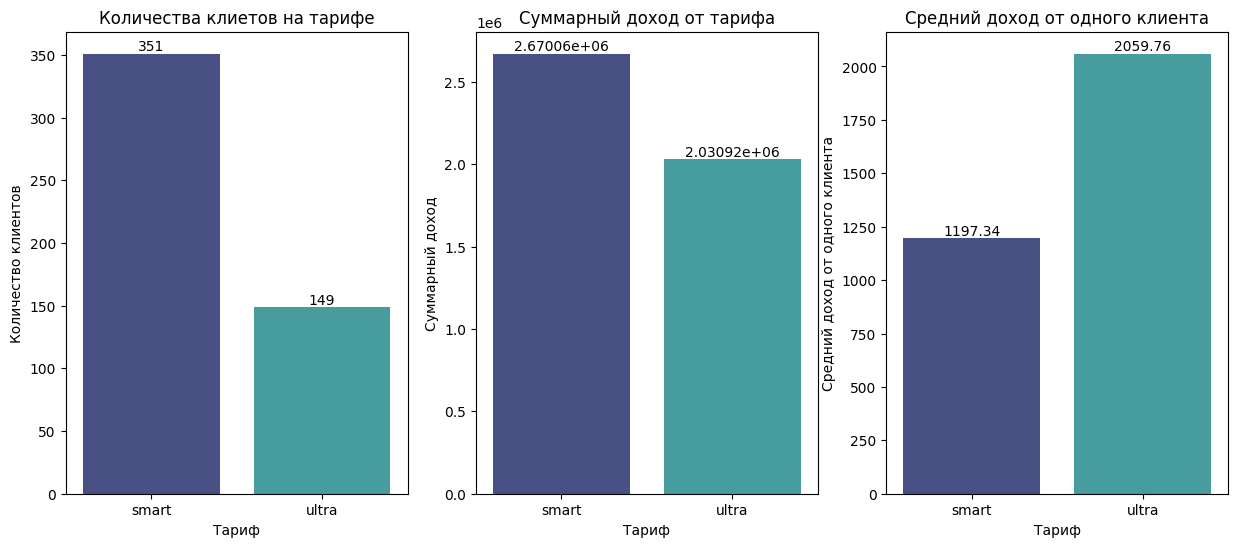

In [37]:
# Изучение сводных данных по тарифам
df_ultra = df_pivot[(df_pivot.tariff == 'ultra')]
df_smart = df_pivot[(df_pivot.tariff == 'smart')]
mean_income_ultra = df_ultra.sum_pay.sum() / df_ultra.shape[0]
mean_income_smart = df_smart.sum_pay.sum() / df_smart.shape[0]
user_to_tariff = df_pivot.groupby(by = 'tariff').user_id.nunique()
income_to_tariff = df_pivot.groupby(by = 'tariff').sum_pay.sum()


# Визуализация сводных данных по тарифам
fig, ax =  plt.subplots(1, 3, figsize = [15, 6])
sns.barplot(x = user_to_tariff.index, y = user_to_tariff.values, palette = "mako", ax = ax[0])
sns.barplot(x = income_to_tariff.index, y = income_to_tariff.values, palette = "mako", ax = ax[1])
sns.barplot(x = ['smart', 'ultra'], y = [mean_income_smart, mean_income_ultra], palette="mako", ax = ax[2])
ax[0].set_title('Количества клиетов на тарифе')
ax[1].set_title('Суммарный доход от тарифа')
ax[2].set_title('Средний доход от одного клиента')
ax[0].set_ylabel('Количество клиентов')
ax[1].set_ylabel('Суммарный доход')
ax[2].set_ylabel('Средний доход от одного клиента')
ax[0].set_xlabel('Тариф')
ax[1].set_xlabel('Тариф')
ax[2].set_xlabel('Тариф')
ax[0].bar_label(ax[0].containers[0], fontsize = 10)
ax[0].bar_label(ax[0].containers[1], fontsize = 10)
ax[1].bar_label(ax[1].containers[0], fontsize = 10)
ax[1].bar_label(ax[1].containers[1], fontsize = 10)
ax[2].bar_label(ax[2].containers[0], fontsize = 10)
ax[2].bar_label(ax[2].containers[1], fontsize = 10)

plt.show();

- число клиентов на Smart - 351, на Ultra - 149
- совокупный годовой доход от клиентов на Smart - 2 670 060, на Ultra - 2 030 920
- средний доход от одного клиента на Smart - 1197,на Ultra 2060

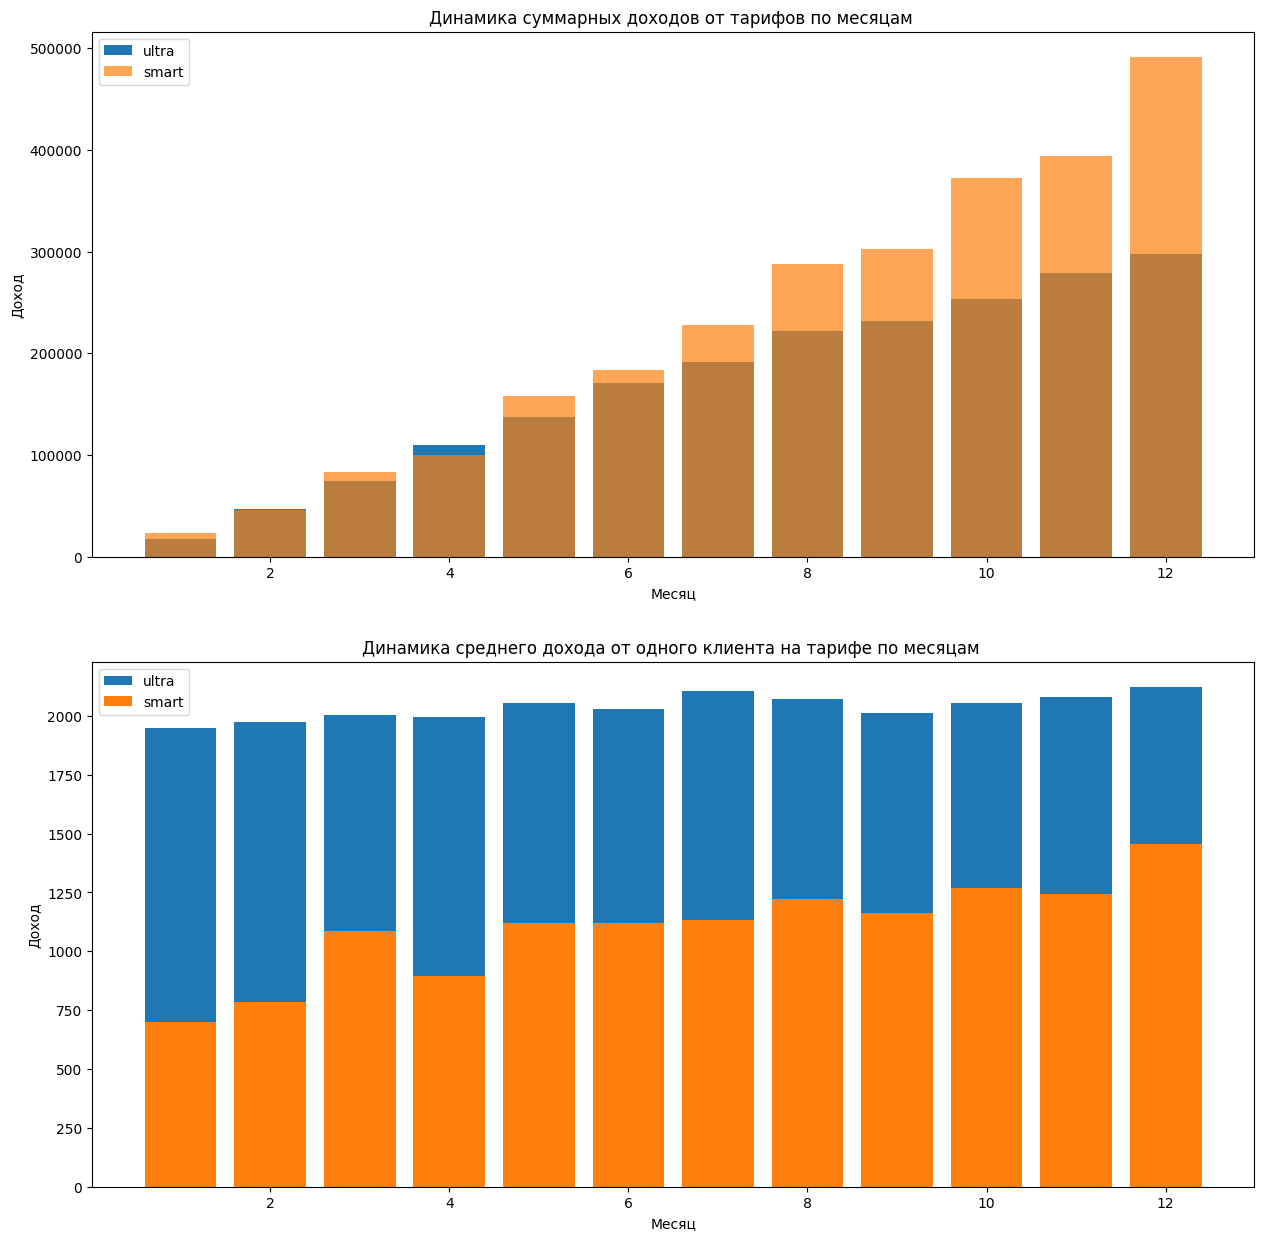

In [43]:
# Изучение помесячной динамики доходов в зависимости от тарифа

month_income_ultra = df_ultra.groupby(['month'])['sum_pay'].sum()
month_income_smart = df_smart.groupby(['month'])['sum_pay'].sum()

mean_month_income_ultra = df_ultra.groupby(by='month').sum_pay.sum() / df_ultra.groupby(by='month').user_id.count()
mean_month_income_smart = df_smart.groupby(by='month').sum_pay.sum() / df_smart.groupby(by='month').user_id.count()

fig, ax =  plt.subplots(2, 1, figsize = [15, 15]) 

ax[0].bar(x = month_income_ultra.index, height = month_income_ultra.values, label = 'ultra')
ax[0].bar(x = month_income_smart.index, height = month_income_smart.values, label = 'smart', alpha = 0.7)

ax[0].set_title('Динамика суммарных доходов от тарифов по месяцам ')
ax[0].set_ylabel('Доход')
ax[0].set_xlabel('Месяц')
ax[1].bar(x = mean_month_income_ultra.index, height = mean_month_income_ultra.values, label = 'ultra')
ax[1].bar(x = mean_month_income_smart.index, height = mean_month_income_smart.values, label = 'smart')

ax[1].set_title('Динамика среднего дохода от одного клиента на тарифе по месяцам ')
ax[1].set_ylabel('Доход')
ax[1].set_xlabel('Месяц')
ax[0].legend()
ax[1].legend()

plt.show();


По совокупному доходу лидирует Smаrt, по доходу от одного клиента - Ultra

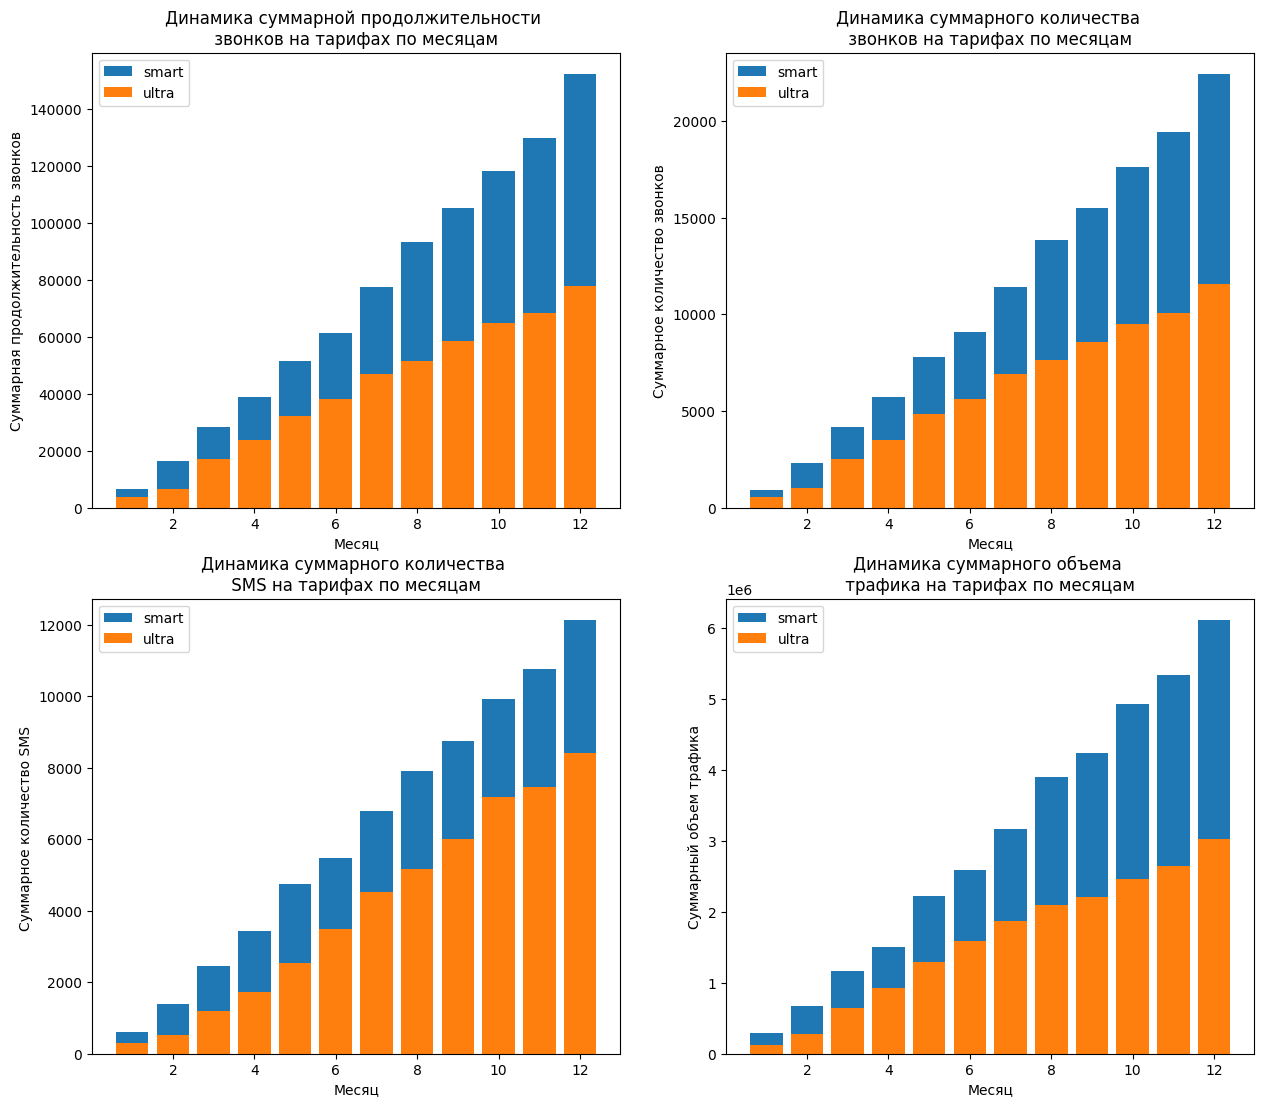

In [40]:
# Изучение динамики суммарного использования услуг в зависимости от тарифа

month_calls_dur_ultra = df_ultra.groupby(['month'])['duration'].sum()
month_calls_dur_smart = df_smart.groupby(['month'])['duration'].sum()
month_calls_ultra = df_ultra.groupby(['month'])['count_call'].sum()
month_calls_smart = df_smart.groupby(['month'])['count_call'].sum()
month_mes_ultra = df_ultra.groupby(['month'])['mess_used'].sum()
month_mes_smart = df_smart.groupby(['month'])['mess_used'].sum()
month_mb_ultra = df_ultra.groupby(['month'])['mb_used'].sum()
month_mb_smart = df_smart.groupby(['month'])['mb_used'].sum()

fig, axs =  plt.subplots(2, 2, figsize = [15, 13]) 

axs[0, 0].bar(x = month_calls_dur_smart.index, height = month_calls_dur_smart.values, label = 'smart')
axs[0, 0].bar(x = month_calls_dur_ultra.index, height = month_calls_dur_ultra.values, label = 'ultra')
axs[0, 0].set_title('Динамика суммарной продолжительности \n звонков на тарифах по месяцам ')
axs[0, 0].set_ylabel('Суммарная продолжительность звонков')
axs[0, 0].set_xlabel('Месяц')

axs[0, 1].bar(x = month_calls_smart.index, height = month_calls_smart.values, label = 'smart')
axs[0, 1].bar(x = month_calls_ultra.index, height = month_calls_ultra.values, label = 'ultra')
axs[0, 1].set_title('Динамика суммарного количества \n звонков на тарифах по месяцам ')
axs[0, 1].set_ylabel('Суммарное количество звонков')
axs[0, 1].set_xlabel('Месяц')

axs[1, 0].bar(x = month_mes_smart.index, height = month_mes_smart.values, label = 'smart')
axs[1, 0].bar(x = month_mes_ultra.index, height = month_mes_ultra.values, label = 'ultra')
axs[1, 0].set_title('Динамика суммарного количества \n SMS на тарифах по месяцам ')
axs[1, 0].set_ylabel('Суммарное количество SMS ')
axs[1, 0].set_xlabel('Месяц')

axs[1, 1].bar(x = month_mb_smart.index, height = month_mb_smart.values, label = 'smart')
axs[1, 1].bar(x = month_mb_ultra.index, height = month_mb_ultra.values, label = 'ultra')
axs[1, 1].set_title('Динамика суммарного объема \n трафика на тарифах по месяцам ')
axs[1, 1].set_ylabel('Суммарный объем трафика')
axs[1, 1].set_xlabel('Месяц')

axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.show();

Показатели Smart превышаю показали Ultra из-за больше базы клиентов

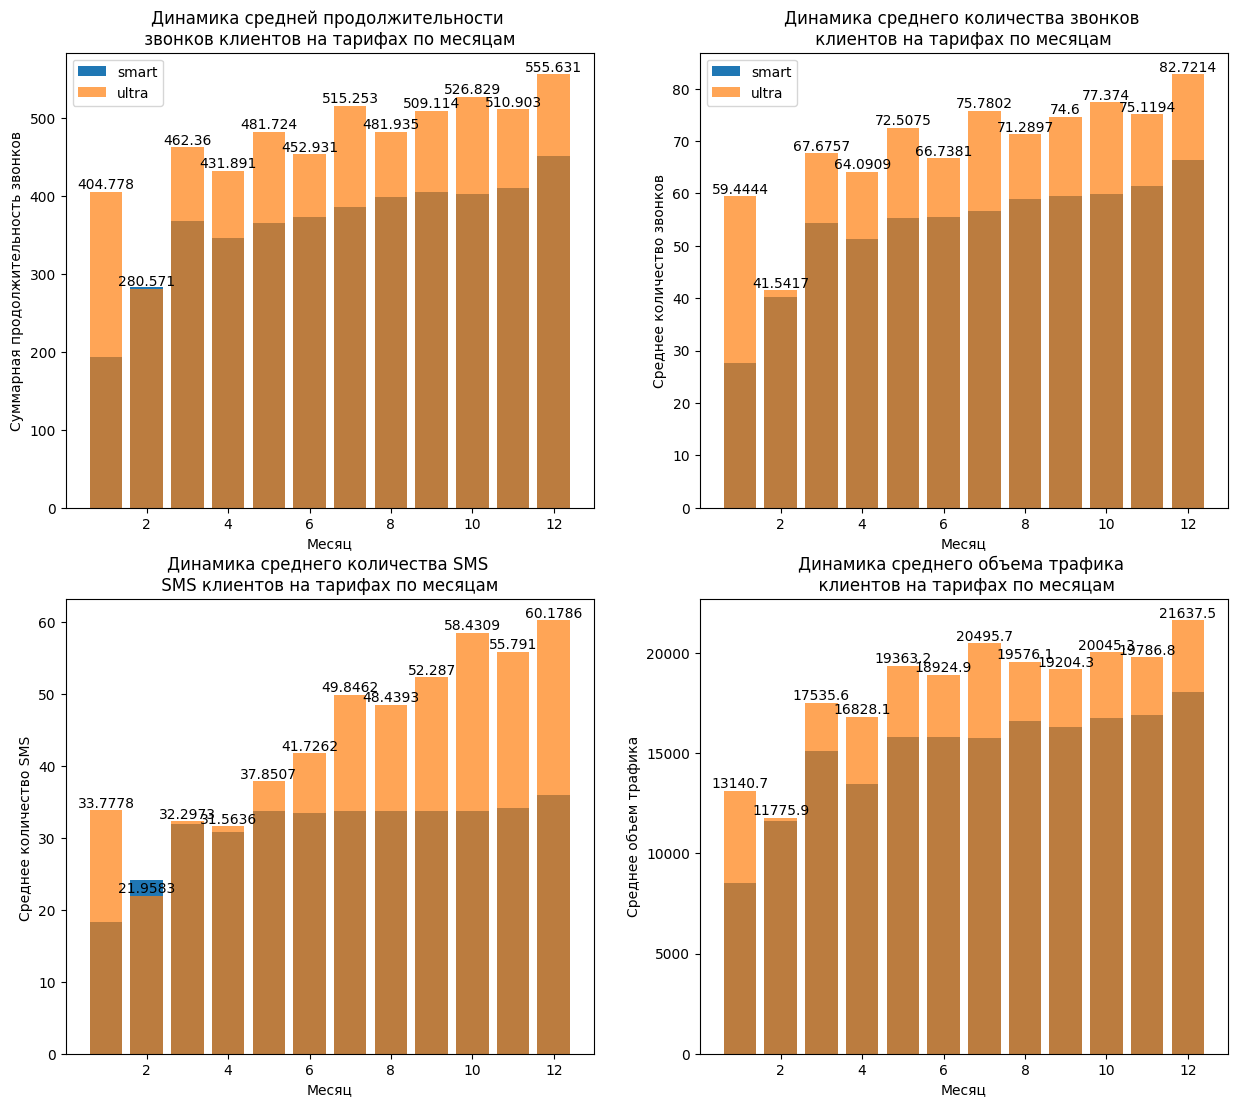

In [41]:
# Изучение динамики среднего объема использования услуг на одного клиента в зависимости от тарифа

mean_calls_dur_ultra = df_ultra.groupby(['month'])['duration'].sum() / df_ultra.groupby(by = 'month').user_id.count()
mean_calls_dur_smart = df_smart.groupby(['month'])['duration'].sum() / df_smart.groupby(by = 'month').user_id.count()
mean_calls_ultra = df_ultra.groupby(['month'])['count_call'].sum() / df_ultra.groupby(by = 'month').user_id.count()
mean_calls_smart = df_smart.groupby(['month'])['count_call'].sum() / df_smart.groupby(by = 'month').user_id.count()
mean_mes_ultra = df_ultra.groupby(['month'])['mess_used'].sum() / df_ultra.groupby(by = 'month').user_id.count()
mean_mes_smart = df_smart.groupby(['month'])['mess_used'].sum() / df_smart.groupby(by = 'month').user_id.count()
mean_mb_ultra = df_ultra.groupby(['month'])['mb_used'].sum() / df_ultra.groupby(by = 'month').user_id.count()
mean_mb_smart = df_smart.groupby(['month'])['mb_used'].sum()/ df_smart.groupby(by = 'month').user_id.count()

fig, axs =  plt.subplots(2, 2, figsize = [15, 13]) 

axs[0, 0].bar(x = mean_calls_dur_smart.index, height = mean_calls_dur_smart.values, label = 'smart')
axs[0, 0].bar(x = mean_calls_dur_ultra.index, height = mean_calls_dur_ultra.values, label = 'ultra', alpha = 0.7)
axs[0, 0].set_title('Динамика средней продолжительности \n звонков клиентов на тарифах по месяцам ')
axs[0, 0].set_ylabel('Суммарная продолжительность звонков')
axs[0, 0].set_xlabel('Месяц')

axs[0, 1].bar(x = mean_calls_smart.index, height = mean_calls_smart.values, label = 'smart')
axs[0, 1].bar(x = mean_calls_ultra.index, height = mean_calls_ultra.values, label = 'ultra', alpha = 0.7)
axs[0, 1].set_title('Динамика среднего количества звонков \n клиентов на тарифах по месяцам ')
axs[0, 1].set_ylabel('Среднее количество звонков')
axs[0, 1].set_xlabel('Месяц')

axs[1, 0].bar(x = mean_mes_smart.index, height = mean_mes_smart.values, label = 'smart')
axs[1, 0].bar(x = mean_mes_ultra.index, height = mean_mes_ultra.values, label = 'ultra', alpha = 0.7)
axs[1, 0].set_title('Динамика среднего количества SMS \n SMS клиентов на тарифах по месяцам ')
axs[1, 0].set_ylabel('Среднее количество SMS ')
axs[1, 0].set_xlabel('Месяц')

axs[1, 1].bar(x = mean_mb_smart.index, height = mean_mb_smart.values, label = 'smart')
axs[1, 1].bar(x = mean_mb_ultra.index, height = mean_mb_ultra.values, label = 'ultra', alpha = 0.7)
axs[1, 1].set_title('Динамика среднего объема трафика \n  клиентов на тарифах по месяцам ')
axs[1, 1].set_ylabel('Среднее объем трафика')
axs[1, 1].set_xlabel('Месяц')

axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].bar_label(axs[0, 0].containers[1], fontsize=10)
axs[0, 1].bar_label(axs[0, 1].containers[1], fontsize=10)
axs[1, 0].bar_label(axs[1, 0].containers[1], fontsize=10)
axs[1, 1].bar_label(axs[1, 1].containers[1], fontsize=10)

plt.show();

Средние показатели потребления услуг по тарифу Ultra выше

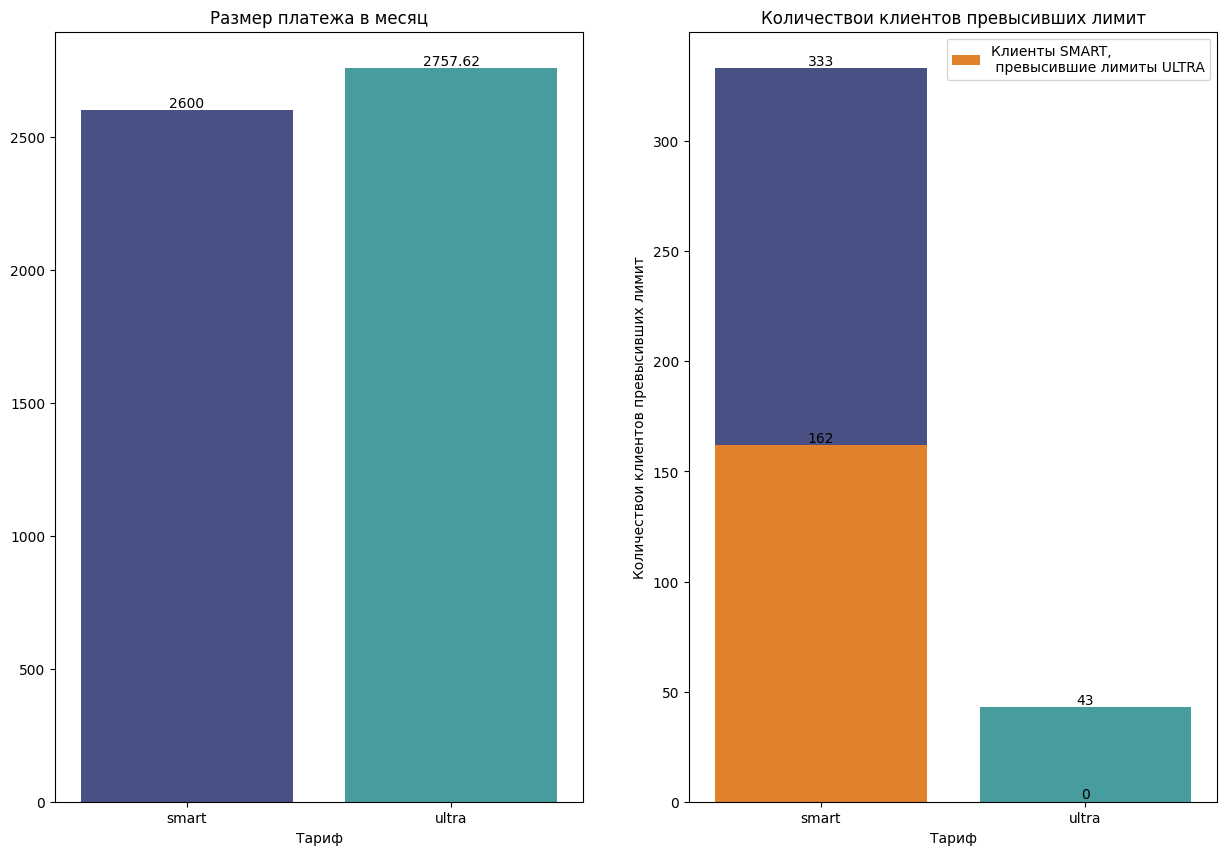

In [42]:
# Изучение клиентов, превысивших лимиты на тарифах
df_off_lim_smart = df_smart[(df_smart.rub_monthly_fee < df_smart.sum_pay)]
df_big_off_lim_smart = df_smart[(1950 < df_smart.sum_pay)]
df_off_lim_ultra = df_ultra[(df_ultra.rub_monthly_fee < df_ultra.sum_pay)]
off_lim_smart = df_off_lim_smart.user_id.nunique()
off_lim_ultra = df_off_lim_ultra.user_id.nunique()
off_big_lim_smart = df_big_off_lim_smart.user_id.nunique()
mean_pay_off_lim_smart = df_big_off_lim_smart.sum_pay.mean()
mean_pay_off_lim_ultra = df_off_lim_ultra.sum_pay.mean()


# Визуализация распределения конверсий по дням 
fig, ax =  plt.subplots(1, 2, figsize = [15, 10])
label_a = 'Клиенты SMART, \n превысившие лимиты ULTRA'
sns.barplot(x = ['smart', 'ultra'], y = [mean_pay_off_lim_smart, mean_pay_off_lim_ultra], palette = "mako", ax = ax[0])
sns.barplot(x = ['smart', 'ultra'], y = [off_lim_smart, off_lim_ultra], palette = "mako", ax = ax[1])
sns.barplot(x = ['smart', 'ultra'], y = [off_big_lim_smart, 0],  ax = ax[1], label = label_a)
ax[0].set_title('Размер платежа в месяц')
ax[1].set_title('Количествои клиентов превысивших лимит')
ax[1].set_ylabel('Средний платеж')
ax[1].set_ylabel('Количествои клиентов превысивших лимит')
ax[0].set_xlabel('Тариф')
ax[1].set_xlabel('Тариф')
ax[0].bar_label(ax[0].containers[0], fontsize = 10)
ax[0].bar_label(ax[0].containers[1], fontsize = 10)
ax[1].bar_label(ax[1].containers[0], fontsize = 10)
ax[1].bar_label(ax[1].containers[1], fontsize = 10)
ax[1].bar_label(ax[1].containers[2], fontsize = 10)

plt.show();

- 43 из 149 клиетов Ultra использую услуги сверх лимита
- 333 из 351 клиетов Smart использую услуги сверх лимита, из них 162 потребляют количество услуг выше лимитов для Ultra
- средний ежемесячный доход от клиетов превышающих объем услуг на Ultra - на тп Ultra 2758, на тп Smart - 2600

## Выводы и рекомендации

Я не спец в маркетинге и не очень знацом с ценообразованием в мобильной связи, но может ввести тариф MEGA где-нибудь за 3000-3500, и предлагать его супер активных клиентов